### Comparison between different algorithms without improvements

* Load the preprocessed data
* Select the desired sample size
* Use different ML algorithms
* Save results for comparison with basic versions
* Compare **all** results via plot

In [32]:
# import all libraries used in "algorithm_comparisons.ipynb"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [33]:
# load "preprocessed_df.csv"
df = pd.read_csv("preprocessed_df.csv")

In [34]:
sample_size = 0.05  # change if necessary

# Zufällige Stichprobenauswahl
df_sample = df.sample(frac=sample_size, random_state=42)

# Teilen Sie die Stichprobe in Trainings- und Testsets
X_sample = df_sample.drop('income', axis=1)
y_sample = df_sample['income']

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [35]:
# best mlp classifier

mlp_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(random_state=42))
])

# Definition des Gitters von Hyperparametern
mlp_param_grid = {
    'smote__sampling_strategy': [0.75, 1.0],
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate_init': [0.001, 0.01]
}

# Initialisierung von GridSearchCV
mlp_grid_search = GridSearchCV(estimator=mlp_pipeline, param_grid=mlp_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Ausführen von GridSearchCV
mlp_grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", mlp_grid_search.best_params_)

# Bewertung auf dem Testset
best_mlp = mlp_grid_search.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Beste Parameter: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.001, 'smote__sampling_strategy': 0.75}


In [36]:
# Metriken berechnen
accuracy_mlp_improved = accuracy_score(y_test, y_pred_mlp)
precision_mlp_improved = precision_score(y_test, y_pred_mlp, zero_division=0)
recall_mlp_improved = recall_score(y_test, y_pred_mlp, zero_division=0)
f1_mlp_improved = f1_score(y_test, y_pred_mlp, zero_division=0)

print(f"Accuracy: {accuracy_mlp_improved}")
print(f"Precision: {precision_mlp_improved}")
print(f"Recall: {recall_mlp_improved}")
print(f"F1-Score: {f1_mlp_improved}")

Accuracy: 0.832
Precision: 0.6277113767153608
Recall: 0.7381572097865695
F1-Score: 0.6784688995215311


In [37]:
# best xgboost classifier

xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Definition des Gitters von Hyperparametern
xgb_param_grid = {
    'smote__sampling_strategy': [0.75, 1.0],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10, 15, 20],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Initialisierung von GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Ausführen von GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", xgb_grid_search.best_params_)

# Bewertung auf dem Testset
best_xgb = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


Beste Parameter: {'smote__sampling_strategy': 0.75, 'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}


In [38]:
# Metriken berechnen
accuracy_xgb_improved = accuracy_score(y_test, y_pred_xgb)
precision_xgb_improved = precision_score(y_test, y_pred_xgb, zero_division=0)
recall_xgb_improved = recall_score(y_test, y_pred_xgb, zero_division=0)
f1_xgb_improved = f1_score(y_test, y_pred_xgb, zero_division=0)

print(f"Accuracy: {accuracy_xgb_improved}")
print(f"Precision: {precision_xgb_improved}")
print(f"Recall: {recall_xgb_improved}")
print(f"F1-Score: {f1_xgb_improved}")

Accuracy: 0.84825
Precision: 0.6591625393966681
Recall: 0.7621030713170224
F1-Score: 0.7069048768710767


In [39]:
# best random forest
rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Definition des Gitters von Hyperparametern
rf_param_grid = {
    'smote__sampling_strategy': [0.75, 1.0],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# Initialisierung von GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Ausführen von GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", rf_grid_search.best_params_)

# Bewertung auf dem Testset
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


Beste Parameter: {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200, 'smote__sampling_strategy': 0.75}


In [40]:
# Metriken berechnen
accuracy_rf_improved = accuracy_score(y_test, y_pred_rf)
precision_rf_improved = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf_improved = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf_improved = f1_score(y_test, y_pred_rf, zero_division=0)

print(f"Accuracy: {accuracy_rf_improved}")
print(f"Precision: {precision_rf_improved}")
print(f"Recall: {recall_rf_improved}")
print(f"F1-Score: {f1_rf_improved}")

Accuracy: 0.838
Precision: 0.6349892008639308
Recall: 0.7652264445601249
F1-Score: 0.6940509915014164


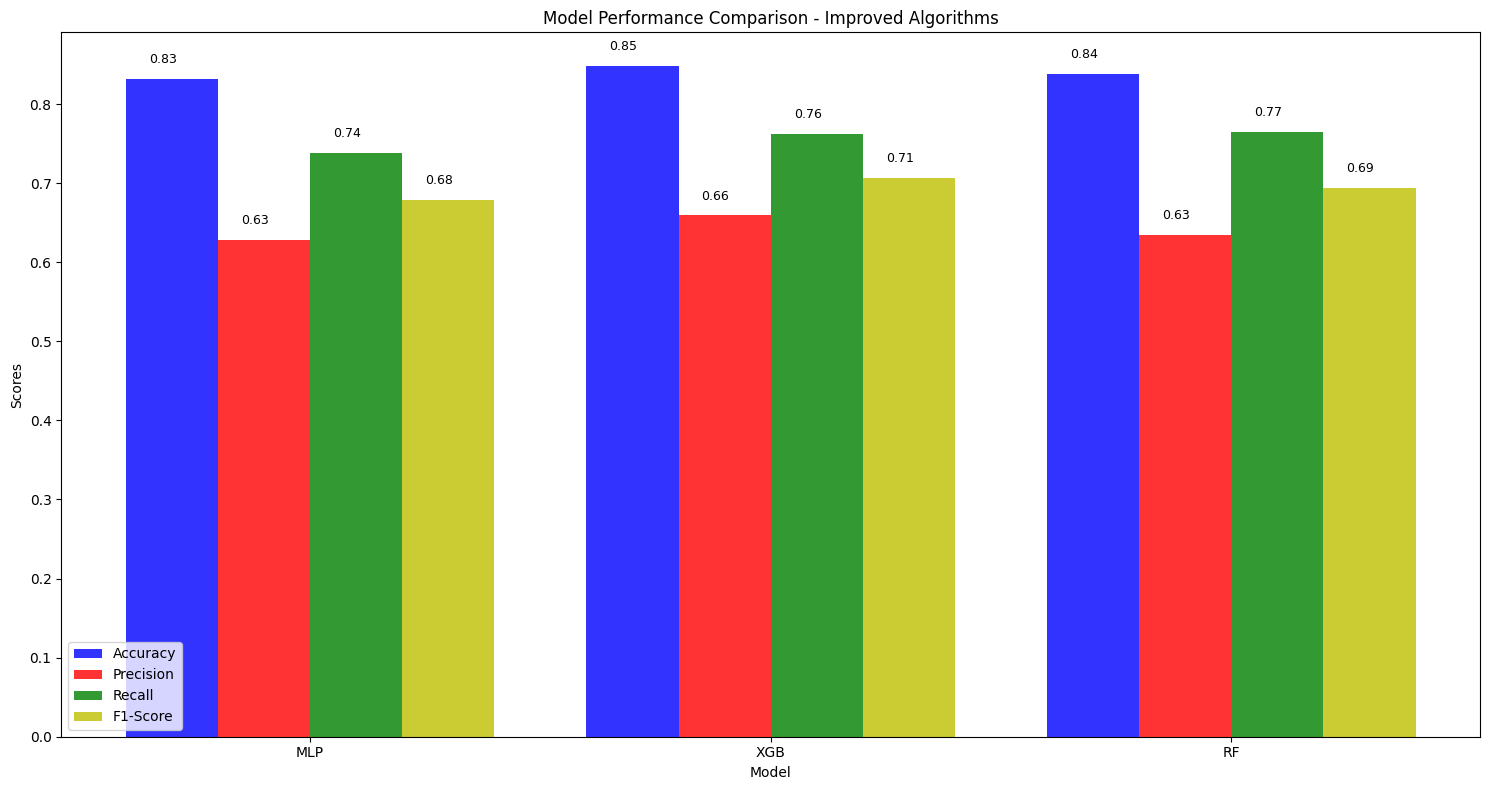

In [42]:
# Erstellen eines Dictionarys mit den Ergebnissen
results = {
    "Model": ["MLP", "XGB", "RF"],
    'accuracy': [accuracy_mlp_improved, accuracy_xgb_improved, accuracy_rf_improved],
    'precision': [precision_mlp_improved, precision_xgb_improved, precision_rf_improved],
    'recall': [recall_mlp_improved, recall_xgb_improved, recall_rf_improved],
    'f1': [f1_mlp_improved, f1_xgb_improved, f1_rf_improved]
}

# Erstellen eines DataFrames mit den Ergebnissen
df_results = pd.DataFrame(results)

# Plot erstellen

plt.figure(figsize=(15, 8))

# Anzahl der Modelle
n_models = len(df_results)

# Erstelle den Balkendiagramm-Index
index = np.arange(n_models)

# Balkenbreite
bar_width = 0.2

# Erstelle Balken für jede Metrik
plt.bar(index, df_results['accuracy'], bar_width, alpha=opacity, color='b', label='Accuracy')
plt.bar(index + bar_width, df_results['precision'], bar_width, alpha=opacity, color='r', label='Precision')
plt.bar(index + 2 * bar_width, df_results['recall'], bar_width, alpha=opacity, color='g', label='Recall')
plt.bar(index + 3 * bar_width, df_results['f1'], bar_width, alpha=opacity, color='y', label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Comparison - Improved Algorithms')
plt.xticks(index + 1.5 * bar_width, df_results['Model'])
plt.legend(loc='lower left')

# Optional: Füge Textlabels über jedem Balken hinzu
for i in index:
    plt.text(x=i - 0.05, y=df_results['accuracy'][i] + 0.02, s=f"{df_results['accuracy'][i]:.2f}", size=9)
    plt.text(x=i + bar_width - 0.05, y=df_results['precision'][i] + 0.02, s=f"{df_results['precision'][i]:.2f}", size=9)
    plt.text(x=i + 2 * bar_width - 0.05, y=df_results['recall'][i] + 0.02, s=f"{df_results['recall'][i]:.2f}", size=9)
    plt.text(x=i + 3 * bar_width - 0.05, y=df_results['f1'][i] + 0.02, s=f"{df_results['f1'][i]:.2f}", size=9)

plt.tight_layout()
plt.show()


Since the attempts shown in this notebook are less successfull than the ones in "algorithms_comparisons.ipynb" I will stop here and continue improving "algorithm_comparisons.ipynb".